In [21]:
# Importamos bibliotecas.

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [22]:
# Importamos los datasets que vamos a utilizar en este programa.

Migrantes = pd.read_csv("Tablas/TABLA. Migrantes - Diseño 2.csv")
Paises = pd.read_csv("Tablas/TABLA. Paises.csv")
Regiones = pd.read_csv("Tablas/TABLA. Regiones.csv")
Secciones = pd.read_csv("Tablas/TABLA. Secciones.csv")
Sedes = pd.read_csv("Tablas/TABLA. Sedes.csv")

In [23]:
# Crear una conexión SQLite en memoria.
Connection = sqlite3.connect(':memory:')

In [24]:
# Cargar dfs en la base de datos SQLite.
Migrantes.to_sql('Migrantes', Connection, index=False, if_exists='replace')
Paises.to_sql('Paises', Connection, index=False, if_exists='replace')
Regiones.to_sql('Regiones', Connection, index=False, if_exists='replace')
Secciones.to_sql('Secciones', Connection, index=False, if_exists='replace')
Sedes.to_sql('Sedes', Connection, index=False, if_exists='replace')

164

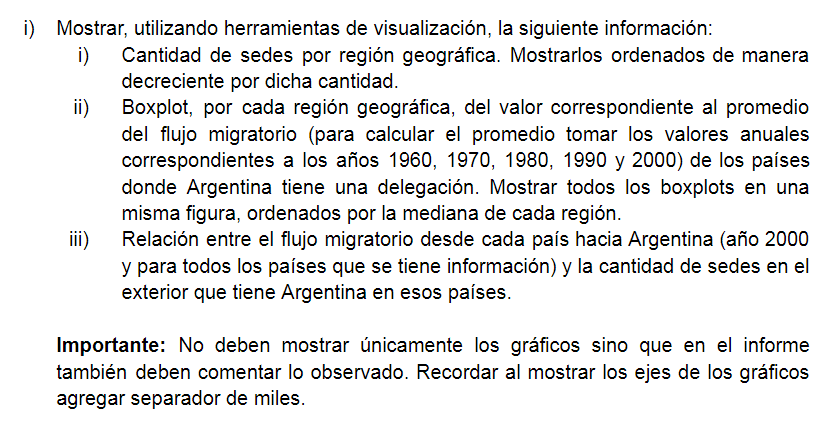

### __Punto i)__

In [25]:
Consulta_SQL = """
               SELECT R.nombre AS region,
                      COUNT(S.id) AS cantidad_sedes
               FROM Paises AS P
               INNER JOIN Sedes AS S ON P.id = S.id_pais
               LEFT JOIN (
                            SELECT SC.id_sede, COUNT(SC.id_sede) AS cant_secciones
                            FROM Secciones AS SC
                            GROUP BY SC.id_sede
                         ) AS CS ON S.id = CS.id_sede
               LEFT JOIN Regiones AS R ON P.id_region = R.id
               GROUP BY R.nombre
               ORDER BY cantidad_sedes DESC;
               
               """

Sedes_Por_Regiones = pd.read_sql_query(Consulta_SQL, Connection)
Sedes_Por_Regiones

,region,cantidad_sedes
0,AMÉRICA DEL SUR,45
1,EUROPA OCCIDENTAL,35
2,ASIA,30
3,AMÉRICA DEL NORTE,16
4,AMÉRICA CENTRAL Y CARIBE,14
5,ÁFRICA SUBSAHARIANA,8
6,EUROPA CENTRAL Y ORIENTAL,8
7,ÁFRICA DEL NORTE Y CERCANO ORIENTE,5
8,OCEANÍA,3


Damos formato "title" a la columna de nombres de regiones.

In [26]:
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.title())

Damos un formato correcto a los conectores.

In [27]:
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.replace(' Y ', ' y ') if ' Y ' in x else x)
Sedes_Por_Regiones['region'] = Sedes_Por_Regiones['region'].apply(lambda x: x.replace(' Del ', ' del ') if ' Del ' in x else x)

C:\Users\tomas\AppData\Local\Temp\ipykernel_9776\1709858054.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Graphic_1.set_xticklabels(Sedes_Por_Regiones['region'], rotation=90, ha='right')


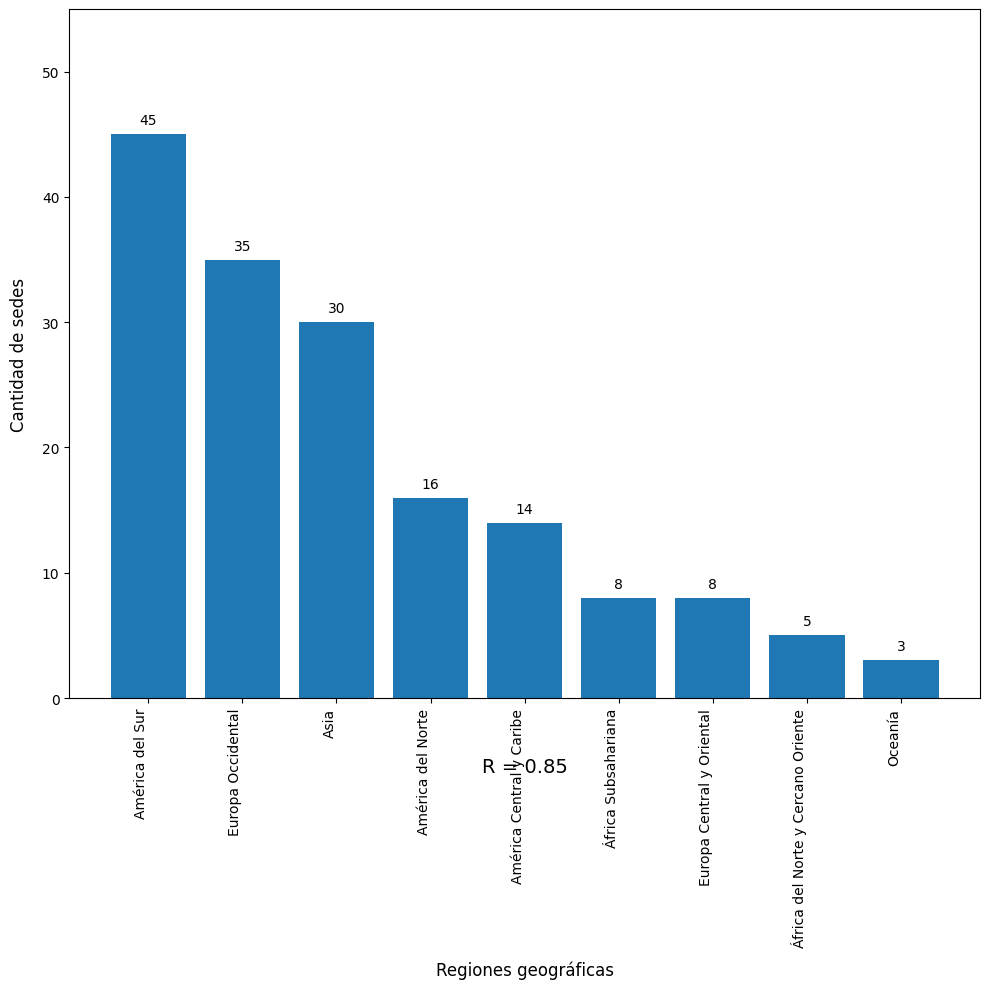

In [32]:
# Crear la figura y ajustar el tamaño.
Figure, Graphic_1 = plt.subplots(figsize=(10, 10))

# Ajustar la fuente global.
plt.rcParams['font.family'] = 'sans-serif'

# Dibujar el gráfico de barras.
Graphic_1.bar(Sedes_Por_Regiones['region'], Sedes_Por_Regiones['cantidad_sedes'])

# Título y etiquetas con mejor formato.
Graphic_1.set_xlabel('Regiones geográficas', fontsize=12, labelpad=10)
Graphic_1.set_ylabel('Cantidad de sedes', fontsize=12, labelpad=10)

# Establecer límite del eje Y dinámicamente.
Graphic_1.set_ylim(0, max(Sedes_Por_Regiones['cantidad_sedes']) + 10)

# Mostrar etiquetas de las barras con el valor exacto.
Graphic_1.bar_label(Graphic_1.containers[0], fontsize=10, padding=5)

# Rotar etiquetas del eje X.
Graphic_1.set_xticklabels(Sedes_Por_Regiones['region'], rotation=90, ha='right')

# Ajustar los márgenes para evitar que las etiquetas se corten.
plt.tight_layout()

# Mostrar el gráfico.
plt.show()

### __Punto ii)__

### __Punto iii)__

In [29]:
Consulta_SQL = """
               SELECT M.id_pais, M.inmigrantes, COUNT(S.id) AS cantidad_sedes
               FROM Migrantes AS M
               LEFT JOIN Paises AS P ON M.id_pais = P.id
               INNER JOIN Sedes AS S ON M.id_pais = S.id_pais
               WHERE anio = 2000
               GROUP BY M.id_pais
               ORDER BY M.inmigrantes DESC
               
               """

Flujo_Migratorio_2000 = pd.read_sql_query(Consulta_SQL, Connection)
Flujo_Migratorio_2000.head(10)

,id_pais,inmigrantes,cantidad_sedes
0,PRY,331688.0,4
1,BOL,237213.0,7
2,ITA,224155.0,4
3,CHL,219104.0,7
4,ESP,137084.0,7
5,URY,119169.0,8
6,PER,91182.0,2
7,BRA,36424.0,11
8,POL,14469.0,1
9,DEU,10420.0,4


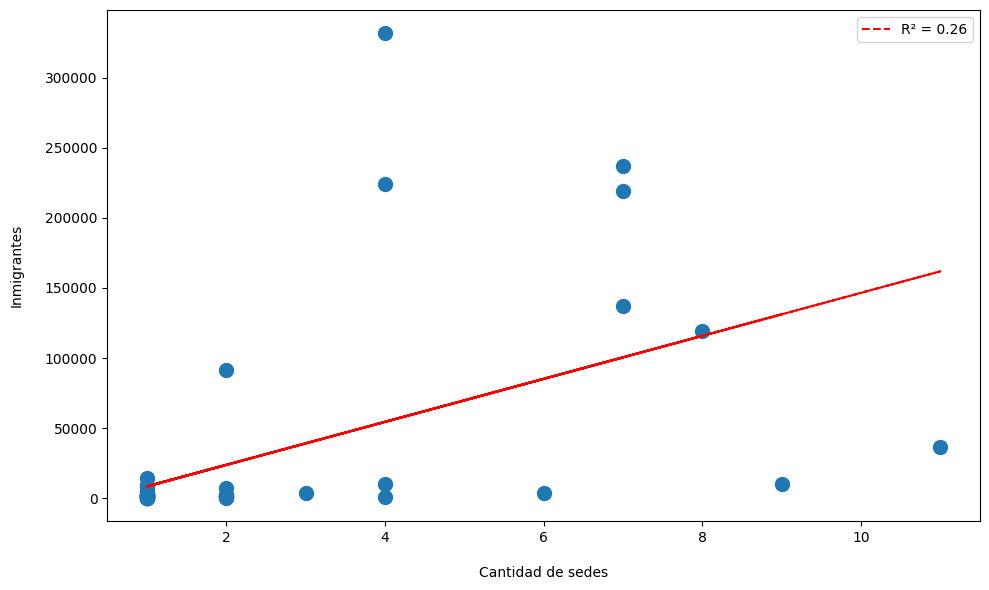

In [40]:
import numpy as np 

# Crear la figura y ajustar el tamaño.
Figure, Graphic_1 = plt.subplots(figsize=(10, 6))

plt.rcParams['font.family'] = 'sans-serif'

# Graficar los datos.
Graphic_1.plot('cantidad_sedes', 'inmigrantes', data=Flujo_Migratorio_2000, marker="o", linestyle='',
               markersize=10, label = '')

# Calcular la línea de tendencia (regresión lineal).
x = Flujo_Migratorio_2000['cantidad_sedes']
y = Flujo_Migratorio_2000['inmigrantes']
Slope, Intercept = np.polyfit(x, y, 1)
Trendline = Slope * x + Intercept

# Calcular R² (coeficiente de determinación).
Correlation_Matrix = np.corrcoef(x, y)
R_value = Correlation_Matrix[0, 1]**2  # R²

# Graficar la línea de tendencia.
Graphic_1.plot(x, Trendline, color='red', linestyle='--', label=f'R² = {R_value:.2f}')

# Etiquetas y título.
Graphic_1.set_ylabel('Inmigrantes', fontsize='medium', labelpad=15)
Graphic_1.set_xlabel('Cantidad de sedes', fontsize='medium', labelpad=15)

# Ajustar el diseño para evitar recortes.
plt.tight_layout()

# Mostrar leyenda.
Graphic_1.legend()

# Mostrar el gráfico.
plt.show()

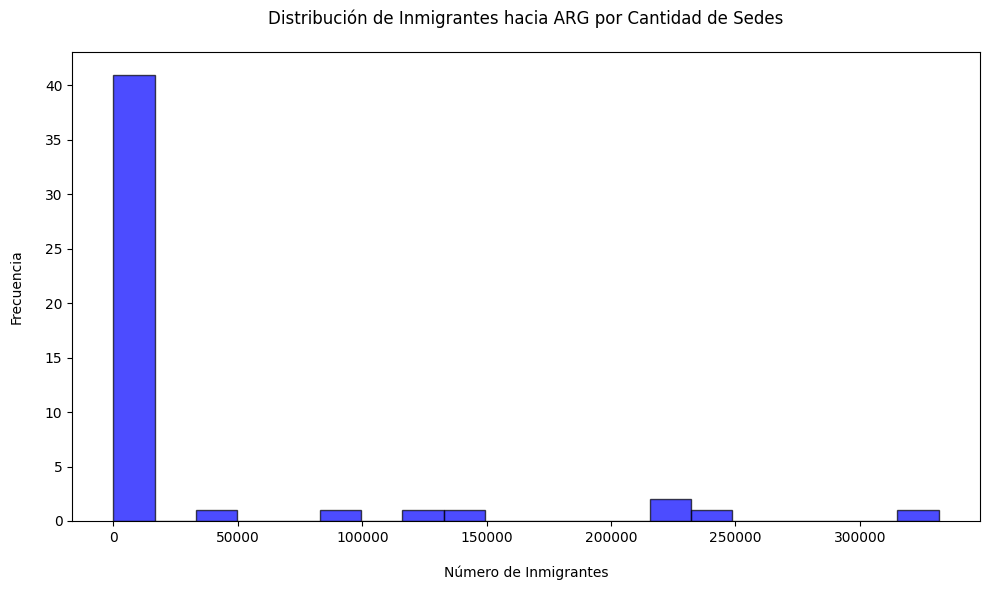

In [31]:
# Crear figura y ejes
Figure, Graphic_1 = plt.subplots(figsize=(10, 6))

# Configurar la fuente
plt.rcParams['font.family'] = 'sans-serif'

# Crear un histograma
Graphic_1.hist(Flujo_Migratorio_2000['inmigrantes'], bins=20, alpha=0.7, color='blue', edgecolor='black')

# Títulos y etiquetas
Graphic_1.set_title('Distribución de Inmigrantes hacia ARG por Cantidad de Sedes', pad=20)
Graphic_1.set_ylabel('Frecuencia', fontsize='medium', labelpad=15)
Graphic_1.set_xlabel('Número de Inmigrantes', fontsize='medium', labelpad=15)

# Mejorar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()